# Livre : Emma de Jane Austen, Maxence GENET

# Sommaire
# **I- Requêtes de base de recherche textuelle**
# 1. Statistiques de base du texte
# 2. Recherche de motifs (patterns) dans le texte
## Mots se terminant par un motif donné
## Mots longs
## Séquences spécifiques de mots (n-grammes)
# 3. Analyse linguistique approfondie
## Identification des personnages (Noms propres les plus fréquents)
## Fréquence des noms communs et des adjectifs
## POS tagging sur un passage (exemple)
## Chunking : extraction de groupes nominaux
# 4. Transformations linguistiques (Stemming, Lemmatisation)
## Stemming : racine de mots
## Lemmatisation : forme canonique des mots
# **II -Requêtes complexes pour une compréhension fine du texte**
## 5. Profil des personnages à l'aide du chunking  
## 6. Graphes des relations entre les personnages
# 7. Thèmes par chapitre puis par volume
## Par volume et le texte entier
# 8.  Sentiment associé aux personnages
# 9. Les lieux et organisations les plus cités
## Les lieux
## Les organisations
#10. Clustering pour les verbes et adjectifs
# 11. Traduction de texte
## Extraire une phrase aléatoires dans le texte
# 12. Pipeline de question réponse
## autres questions
# **Conclusion**

 Avant de choisir ce texte, je travaillais sur un autre livre de l'auteur : raisons et sensiblités. Je souhaitais faire une analyse sur les thèmes principaux de ce livre sur la raison, les émotions à travers les 2 personnages principaux, pour voir comme distinguer des profils à partir des mots associés au personnages. Mais, j'ai préféré choisir un autre livre de l'auteur, qui est Emma, d'une part pour être assuré qu'il est intéréssant et complet pour faire de l'analyse sémantique et pour aussi de pas savoir au préalable ce que je pourrais faire comme requête sans avoir fais une exploration des données. Dans ce notebook, c'est au fur et à mesure des requetes, que j'ai pu comprendre en quoi parlant de ce livre, comment il était constitué, quel était les lieux, personnages intéressants à analyser et aussi par des fonctions complexes comment on pouvait analyser un texte en profondeur.

 On va donc utilisé le corpus Gutenberg de NLTK pour obtenir le texte brut puis on le tokenise (découpe en mots individuels). Nous filtrerons les tokens pour éliminer la ponctuation lors du calcul de certaines statistiques.

Import du texte à étudier

In [ ]:
import nltk
from nltk.corpus import gutenberg

# Télécharger les données nécessaires (une seule fois)
nltk.download('gutenberg')
nltk.download('punkt_tab')

# Charger le texte "Emma" de Jane Austen depuis le corpus Gutenberg
data = gutenberg.raw('austen-emma.txt')

# Tokeniser le texte en mots (y compris ponctuation)
tokens = nltk.word_tokenize(data)



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **I- Requêtes de base de recherche textuelle**

# 1. Statistiques de base du texte
On commence par charger le texte et calculer quelques statistiques simples : nombre de mots, nombre de phrases, longueur moyenne des mots et des phrases, etc

In [ ]:
# Filtrer les tokens pour ne garder que les mots composés de lettres (on ignore la ponctuation)
words = [w for w in tokens if w.isalpha()]

# Calculer le nombre de mots et de phrases
num_words = len(words)
num_sentences = len(nltk.sent_tokenize(data))

# Calculer la longueur moyenne des mots et des phrases
avg_word_length = sum(len(w) for w in words) / num_words
avg_sentence_length = num_words / num_sentences

print("Nombre de mots (sans ponctuation) :", num_words)
print("Nombre de phrases :", num_sentences)
print("Longueur moyenne d'un mot : {:.2f} caractères".format(avg_word_length))
print("Longueur moyenne d'une phrase : {:.2f} mots".format(avg_sentence_length))


Nombre de mots (sans ponctuation) : 157114
Nombre de phrases : 7493
Longueur moyenne d'un mot : 4.25 caractères
Longueur moyenne d'une phrase : 20.97 mots


On passe à la distribution des lettres dans le texte. Le code suivant calcule la fréquence de chaque lettre de l’alphabet (en minuscule) dans l’ensemble du roman :

In [ ]:
from collections import Counter

# Extraire toutes les lettres (alphabetiques) en minuscules depuis data
letters = [ch.lower() for ch in data if ch.isalpha()]

# Calculer la fréquence des lettres
freq_letters = Counter(letters)

# Afficher les 5 lettres les plus fréquentes
print("5 lettres les plus fréquentes :")
for letter, freq in freq_letters.most_common(5):
    print(letter, ":", freq)

# Afficher les 5 lettres les moins fréquentes
print("\n5 lettres les moins fréquentes :")
# On récupère la liste triée en ordre décroissant et on affiche les 5 derniers
for letter, freq in freq_letters.most_common()[:-6:-1]:
    print(letter, ":", freq)


5 lettres les plus fréquentes :
e : 86021
t : 59201
a : 54379
o : 53199
n : 47288

5 lettres les moins fréquentes :
z : 175
q : 910
j : 1121
x : 1378
k : 4763


On observe typiquement que la lettre “e” est la plus fréquente (comme souvent en anglais), suivie des lettres “t”, “a”, “o”, “i” etc. À l’inverse, des lettres comme “z” ou “q” sont très rares dans le roman. On peut également examiner la première et la dernière lettre des mots pour voir si certaines lettres sont plus communes en début ou fin de mot. Le code suivant construit ces distributions :

In [ ]:
# Fréquence de la première et de la dernière lettre des mots
first_letters = [w[0].lower() for w in words]
last_letters  = [w[-1].lower() for w in words]
freq_first = Counter(first_letters)
freq_last = Counter(last_letters)
print("Premières lettres les plus fréquentes :", freq_first.most_common(5))
print("Dernières lettres les plus fréquentes  :", freq_last.most_common(5))


Premières lettres les plus fréquentes : [('t', 19754), ('a', 18030), ('h', 13717), ('s', 12006), ('w', 11849)]
Dernières lettres les plus fréquentes  : [('e', 29097), ('t', 18452), ('d', 17917), ('s', 13991), ('n', 11517)]


On constate par exemple que les mots commencent très souvent par “t” (beaucoup de mots comme the, to, that, etc.) ou “s” (she, said, so…), alors que la lettre initiale “q” est rare. En fin de mot, la lettre “e” domine largement (de nombreux mots anglais se terminent par -e muet), suivie de “d” (marque du passé -ed) et “s” (marque du pluriel -s). Cela reflète bien les structures grammaticales de l’anglais.

# 2. Recherche de motifs (patterns) dans le texte
Dans cette section, nous effectuons des recherches par motif sur les mots du roman : présence d’une sous-chaîne, suffixe particulier, longueur du mot, séquences de mots les plus fréquentes, etc. Utilisons la liste words (mots filtrés sans ponctuation) définie précédemment.

Mots contenant une sous-chaîne spécifique
On peut par exemple chercher tous les mots contenant la séquence de lettres “ing” (très courante en anglais, pour les formes verbales en -ing). Le code suivant extrait ces mots

In [ ]:
# Exemple : mots contenant "ing"
pattern = "ing"
words_with_ing = [w for w in words if pattern in w.lower()]
print(f"{len(words_with_ing)} mots contiennent '{pattern}' (exemples) :", words_with_ing[:10])


5113 mots contiennent 'ing' (exemples) : ['blessings', 'being', 'living', 'doing', 'esteeming', 'having', 'wedding', 'evening', 'considering', 'morning']


Ce script convertit les mots en minuscules (w.lower()) puis vérifie si "ing" est une sous-chaîne du mot. La sortie affiche le nombre de mots trouvés et quelques exemples. Dans Emma, on trouvera par exemple des mots comme 'blessings', 'being', 'living', 'doing', etc., contenant “ing”.

## Mots se terminant par un motif donné
De la même manière, on peut trouver les mots qui se terminent par un certain suffixe. Prenons par exemple le suffixe “ly”, fréquent pour les adverbes en anglais (slowly, quickly, etc.). On utilise la méthode str.endswith :

In [ ]:
# Exemple : mots finissant par "ly"
suffix = "ly"
words_ending_ly = [w for w in words if w.lower().endswith(suffix)]
print(f"{len(words_ending_ly)} mots se terminent par '{suffix}' (exemples) :", words_ending_ly[:10])


2792 mots se terminent par 'ly' (exemples) : ['nearly', 'early', 'family', 'particularly', 'hardly', 'mutually', 'highly', 'chiefly', 'only', 'family']


Ce code renverra des mots comme 'nearly', 'early', 'family', etc. Note : certains mots comme family se terminent par “ly” sans être des adverbes – nous faisons ici une recherche textuelle pure, sans analyse grammaticale à ce stade

 ## Mots longs
Intéressons-nous aux mots longs. On peut définir arbitrairement un seuil, par exemple les mots de plus de 12 lettres. Le code ci-dessous filtre la liste des mots sur la longueur :

In [ ]:
# Mots de plus de 12 caractères
long_words = [w for w in words if len(w) > 12]
print(f"{len(long_words)} mots font plus de 12 lettres :")
print(long_words[:10])


548 mots font plus de 12 lettres :
['disadvantages', 'unexceptionable', 'valetudinarian', 'comparatively', 'satisfactorily', 'congratulations', 'encouragements', 'straightforward', 'understanding', 'mortification']


On obtiendra la liste des termes particulièrement longs du roman. Dans Emma, Jane Austen utilise parfois de longs mots.  Compter et lister ces mots peut être utile pour repérer le vocabulaire complexe ou technique.

 ## Séquences spécifiques de mots (n-grammes)
Un n-gramme est une séquence de n mots consécutifs. Ici, nous allons extraire les bigrammes (n = 2, paires de mots) les plus fréquents du roman. Cela permet d’identifier des expressions récurrentes. On peut utiliser nltk.bigrams pour générer tous les bigrammes, puis un FreqDist (distribution de fréquence) pour compter les occurrences

In [ ]:
from nltk import FreqDist, bigrams

# Calculer les bigrammes à partir de la liste de mots
bigram_list = list(bigrams(words))
freq_bigrams = FreqDist(bigram_list)

# Afficher les 5 bigrammes les plus fréquents avec leur fréquence
for pair, freq in freq_bigrams.most_common(5):
    print(f"Bigramme {pair} : {freq} occurrences")


Bigramme ('to', 'be') : 593 occurrences
Bigramme ('of', 'the') : 557 occurrences
Bigramme ('in', 'the') : 434 occurrences
Bigramme ('I', 'am') : 394 occurrences
Bigramme ('had', 'been') : 307 occurrences


La sortie montre les paires de mots les plus courantes. Dans Emma, on trouvera très probablement des combinaisons fréquentes de mots-outils, par exemple : ("of", "the"), ("to", "be"),etc. Par exemple, “of the” (de le/la) apparaît extrêmement souvent en anglais.

In [ ]:
from nltk import ngrams, FreqDist

# Calculer les trigrammes à partir de la liste de mots
trigram_list = list(ngrams(words, 3))
freq_trigrams = FreqDist(trigram_list)

# Afficher les 5 trigrammes les plus fréquents avec leur fréquence
for triplet, freq in freq_trigrams.most_common(10):
    print(f"Trigramme {triplet} : {freq} occurrences")


Trigramme ('I', 'do', 'not') : 135 occurrences
Trigramme ('I', 'am', 'sure') : 107 occurrences
Trigramme ('I', 'can', 'not') : 66 occurrences
Trigramme ('a', 'great', 'deal') : 63 occurrences
Trigramme ('would', 'have', 'been') : 59 occurrences
Trigramme ('do', 'not', 'know') : 54 occurrences
Trigramme ('she', 'could', 'not') : 52 occurrences
Trigramme ('I', 'dare', 'say') : 50 occurrences
Trigramme ('in', 'the', 'world') : 48 occurrences
Trigramme ('she', 'had', 'been') : 46 occurrences


On peut disntinguer un tri-gram fréquemment utilisé qui est in the world, qui pourrait être intéressantà exploiter par la suite. De plus, on constate beaucoup de "she" , de pronom personnel au féminin, qui indiquerait une forte présence de personnages féminins dans le texte.

# 3. Analyse linguistique approfondie
Nous allons maintenant réaliser des analyses plus linguistiques : identification des personnages (noms propres), fréquences des catégories grammaticales (noms, adjectifs), étiquetage grammatical d’un passage (POS tagging) et extraction de certains groupes syntaxiques (chunks, par ex. groupes nominaux). Pour cela, il est utile d’utiliser un tagger grammatical. NLTK fournit un part-of-speech tagger qui assigne à chaque mot une étiquette grammaticale (NN pour nom, JJ pour adjectif, VB pour verbe, etc.). Commençons par étiqueter tous les mots de Emma avec le tagger de NLTK :

In [ ]:
# Étiquetage grammatical (Part-of-Speech tagging) sur tous les mots du texte
# préciser à partir de quel ligne, pour un truc mieux
nltk.download('averaged_perceptron_tagger_eng')
pos_tags = nltk.pos_tag(words)
# pos_tags est une liste de tuples (mot, étiquette)
print(pos_tags[:30])


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Emma', 'NN'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), ('handsome', 'VBD'), ('clever', 'NN'), ('and', 'CC'), ('rich', 'JJ'), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN')]


### Universal Tagset avec `nltk.pos_tag` <a name="universalTag">

 #### Différences principales
####Simplicité
- **Penn Treebank Tagset** : 36 tags offrant des distinctions grammaticales plus précises.

#### Objectif
- **Universal Tagset** : Conçu pour la cohérence entre les langues, adapté aux tâches multilingues.
- **Penn Treebank Tagset** : Fournit des informations détaillées spécifiques à l'anglais.

## Penn Treebank Tagset

| Tag   | Description                        | Examples                      |
|-------|------------------------------------|--------------------------------|
| CC    | Coordinating conjunction          | and, but, or                  |
| CD    | Cardinal digit                    | 1, two, 3.14                 |
| DT    | Determiner                        | the, a, an                    |
| EX    | Existential there                 | there (e.g., "there is")      |
| FW    | Foreign word                      | déjà, faux                    |
| IN    | Preposition/subordinating conjunction | in, on, during, that      |
| JJ    | Adjective                         | big, red                      |
| JJR   | Adjective, comparative            | bigger, taller                |
| JJS   | Adjective, superlative            | biggest, tallest              |
| LS    | List marker                       | 1), A., B.                    |
| MD    | Modal                             | can, will, should             |
| NN    | Noun, singular                    | desk, book                    |
| NNS   | Noun, plural                      | desks, books                  |
| NNP   | Proper noun, singular             | Harrison, Paris               |
| NNPS  | Proper noun, plural               | Americans, Beatles            |
| PDT   | Predeterminer                     | all, both                     |
| POS   | Possessive ending                 | 's (parent's)                 |
| PRP   | Personal pronoun                  | I, he, she                    |
| PRP$\$$  | Possessive pronoun                | my, his, hers                 |
| RB    | Adverb                            | very, silently                |
| RBR   | Adverb, comparative               | better, faster                |
| RBS   | Adverb, superlative               | best, fastest                 |
| RP    | Particle                          | give up, shut down            |
| TO    | To                                | to (e.g., "go to the store")  |
| UH    | Interjection                      | uh, oh, wow                   |
| VB    | Verb, base form                   | take, run                     |
| VBD   | Verb, past tense                  | took, ran                     |
| VBG   | Verb, gerund/present participle   | taking, running               |
| VBN   | Verb, past participle             | taken, run                    |
| VBP   | Verb, sing. present, non-3rd person | take, run                   |
| VBZ   | Verb, 3rd person sing. present    | takes, runs                   |
| WDT   | Wh-determiner                     | which, that                   |
| WP    | Wh-pronoun                        | who, what                     |
| WP$\$$   | Possessive wh-pronoun             | whose                         |
| WRB   | Wh-adverb                         | where, when                   |


Ce qui correspond au début de la phrase d’ouverture “Emma Woodhouse, handsome, clever, and rich, ...”. Ici NNP indique un Nom Propre au singulier, JJ un Adjectif qualificatif, CC une Conjonction de coordination (ici "and"). Nous pouvons exploiter cette liste étiquetée pour extraire certaines catégories de mots :

## Identification des personnages (Noms propres les plus fréquents)
En filtrant pos_tags pour ne garder que les tokens étiquetés comme noms propres (NNP ou NNPS), on obtient la liste de tous les noms de personnes, lieux, etc., mentionnés dans le roman. Ensuite, on peut compter leurs fréquences.

In [ ]:
# Extraire les noms propres
proper_nouns = [word for (word, tag) in pos_tags if tag in ("NNP", "NNPS")]
fdist_proper = FreqDist(proper_nouns)

# Afficher les 10 noms propres les plus fréquents
for name, freq in fdist_proper.most_common(20):
    print(f"{name} : {freq} occurrences")


Emma : 827 occurrences
Miss : 578 occurrences
Harriet : 487 occurrences
Weston : 433 occurrences
Elton : 382 occurrences
Knightley : 378 occurrences
Jane : 298 occurrences
Woodhouse : 285 occurrences
Fairfax : 233 occurrences
Churchill : 217 occurrences
Frank : 207 occurrences
Hartfield : 160 occurrences
Oh : 154 occurrences
Bates : 138 occurrences
Highbury : 122 occurrences
Smith : 89 occurrences
John : 89 occurrences
Randalls : 87 occurrences
Martin : 84 occurrences
Perry : 78 occurrences


Le résultat fait apparaître les principaux personnages du roman. Par exemple, les noms Emma, Harriet, Knightley, Elton, Jane, Frank, Weston, etc., avec le nombre d’occurrences de chacun. On s’attend notamment à ce que Emma soit le nom le plus fréquent (c’est l’héroïne et le roman porte son nom). On remarque aussi qu'il considère l'interjection "Oh", comme un NPP ou NNPS, cette fonction peut donc inclure des erreurs. On verra par la suite qu'on utilisera une fonction pour extraire ces noms propres, et voir où ils  apparaissent afin de les contextualiser et de voir qu'il s'agit bien d'un nom propre.

## Fréquence des noms communs et des adjectifs
De même, on peut extraire d’autres catégories grammaticales. Par exemple, filtrons les noms communs (tag NN pour singulier, NNS pour pluriel) et les adjectifs (JJ, JJR – comparatif, JJS – superlatif) pour voir quels sont les plus fréquents :

In [ ]:
# Fréquence des noms communs
common_nouns = [word.lower() for (word, tag) in pos_tags if tag in ("NN", "NNS")]
fdist_nouns = FreqDist(common_nouns)
print("Top 5 noms communs :", fdist_nouns.most_common(5))


# Fréquence des adjectifs
adjectives = [word.lower() for (word, tag) in pos_tags if tag.startswith("JJ")]
fdist_adjs = FreqDist(adjectives)
print("Top 5 adjectifs :", fdist_adjs.most_common(5))

# Fréquence des verbes
adjectives = [word.lower() for (word, tag) in pos_tags if tag.startswith("VB")]
fdist_adjs = FreqDist(adjectives)
print("Top 5 verbe :", fdist_adjs.most_common(5))


Top 5 noms communs : [('thing', 394), ('time', 268), ('nothing', 239), ('man', 231), ('father', 197)]
Top 5 adjectifs : [('such', 353), ('little', 343), ('much', 312), ('good', 293), ('own', 287)]
Top 5 verbe : [('was', 2387), ('be', 1967), ('had', 1617), ('have', 1315), ('is', 1236)]


Pour Emma, les noms communs les plus fréquents sont  des termes génériques comme “time” (temps), “thing” (chose), “father” (père).  Parmi les adjectifs, on voit des mots descriptifs récurrents. Par exemple, Jane Austen utilise souvent “little” (petit) et such (très) – ce dernier est taggé comme adverbe (RB) quand il modifie un adjectif, mais aussi parfois adjectif.
Pour les verbes, il s'agit notamment des participes passé "was" , "had"( prétérit également). Il s'agit notamment de verbe d'état(be).
D’autres adjectifs fréquents sont  “good” (bon),  Cette extraction nous renseigne sur le ton et les préoccupations du roman (beaucoup de petit, bon, good, father, be apparaissent).


## POS tagging sur un passage (exemple)
Regardons concrètement l’étiquetage grammatical sur une phrase du roman. Prenons la phrase d’ouverture célèbre du livre :

In [ ]:
sentence = "Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence."
print(nltk.pos_tag(nltk.word_tokenize(sentence)))


[('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), ('.', '.')]


On voit que NLTK a bien identifié Emma et Woodhouse comme NNP (noms propres), handsome, clever, rich, comfortable, happy comme JJ (adjectifs), home, disposition, existence comme noms (NN ou NNS), seemed est un verbe au passé (VBD), etc. Ce POS tagging fournit la base pour des analyses grammaticales plus poussées

 ## Chunking : extraction de groupes nominaux
Le chunking consiste à regrouper les tokens en constituants syntaxiques. Par exemple, on peut extraire tous les groupes nominaux (noun phrases, NP) du texte. Un groupe nominal est typiquement constitué d’un déterminant optionnel (DT), de zéro, un ou plusieurs adjectifs (JJ) et d’un ou plusieurs noms (NN). On peut définir une grammaire de chunk toute simple pour les groupes nominaux et l’appliquer avec nltk.RegexpParser :

In [ ]:
# Définir une grammaire de chunk pour les groupes nominaux (NP)
grammar = r"NP: {<DT>?<JJ.*>*<NN.*>+}"
chunk_parser = nltk.RegexpParser(grammar)

# Parser un exemple de phrase (ici, la phrase définie ci-dessus)
tree = chunk_parser.parse(nltk.pos_tag(nltk.word_tokenize(sentence)))
print(tree)


(S
  (NP Emma/NNP Woodhouse/NNP)
  ,/,
  (NP handsome/NN)
  ,/,
  (NP clever/NN)
  ,/,
  and/CC
  rich/JJ
  ,/,
  with/IN
  (NP a/DT comfortable/JJ home/NN)
  and/CC
  (NP happy/JJ disposition/NN)
  ,/,
  seemed/VBD
  to/TO
  unite/VB
  some/DT
  of/IN
  (NP the/DT best/JJS blessings/NNS)
  of/IN
  (NP existence/NN)
  ./.)


La grammaire NP: {<DT>?<JJ.*>*<NN.*>+} signifie : un chunk NP commence éventuellement par un déterminant (<DT>?), suivi de zéro ou plusieurs adjectifs (<JJ.*>* attrape JJ, JJR, JJS), puis d’un ou plusieurs noms (<NN.*>+ attrape NN, NNS, NNP, NNPS). En appliquant cela à notre phrase d’exemple, on obtiendra des chunks correspondant aux groupes nominaux :
[NP Emma Woodhouse] (deux NNP consécutifs forment un NP)
[NP a comfortable home] (DT + JJ + NN)
[NP happy disposition] (JJ + NN)
[NP the best blessings] (DT + JJS + NNS)
[NP existence] (NN seul)
On peut extraire ces groupes nominaux en parcourant l’arbre de chunks

In [ ]:
# Extraire les libellés des NP identifiés
noun_phrases = [" ".join(word for word, tag in subtree.leaves())
                for subtree in tree.subtrees() if subtree.label() == "NP"]
print("Groupes nominaux extraits :", noun_phrases)


Groupes nominaux extraits : ['Emma Woodhouse', 'handsome', 'clever', 'a comfortable home', 'happy disposition', 'the best blessings', 'existence']


Chaque élément est une noun phrase du texte. Appliqué à l’ensemble du roman (sur toutes les phrases), on pourrait ainsi lister tous les groupes nominaux utilisés. Cela permet par exemple d’identifier des syntagmes récurrents ou caractéristiques du style de l’auteur.

# 4. Transformations linguistiques (Stemming, Lemmatisation)
Dans cette partie, nous allons normaliser les mots du texte de deux façons et observer l’impact sur le vocabulaire et les fréquences :
Par Stemming (réduction à la racine ; on utilise l’algorithme de Porter)
Par Lemmatisation (réduction à la forme canonique, en s’appuyant sur un vocabulaire)
Puis nous comparerons le nombre de formes distinctes (avant/après) et verrons comment les fréquences de certains mots se regroupent après ces transformations.

## Stemming : racine des mots
Le stemming consiste à tronquer les mots pour en garder la racine (même si ce n’est pas un mot valide). Par exemple, “married”, “marry” et “marrying” ont tous pour racine “marri” avec le Porter Stemmer. On utilise NLTK :

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stems = [stemmer.stem(w) for w in words]
print(words[:50], "->", [stemmer.stem(w) for w in words[:50]])


['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the'] -> ['emma', 'by', 'jane', 'austen', 'volum', 'i', 'chapter', 'i', 'emma', 'woodhous', 'handsom', 'clever', 'and', 'rich', 'with', 'a', 'comfort', 'home', 'and', 'happi', 'disposit', 'seem', 'to', 'unit', 'some', 'of', 'the', 'best', 'bless', 'of', 'exist', 'and', 'had', 'live', 'nearli', 'year', 'in', 'the', 'world', 'with', 'veri', 'littl', 'to', 'distress', 'or', 'vex', 'her', 'she', 'wa', 'the']


Ce code utilise le stemmer de Porter pour transformer chaque mot du texte en sa forme racine, ce qui permet de regrouper plusieurs variantes morphologiques d’un même mot en une seule représentation, par exemple :

- "Emma" reste "emma", "handsome" devient "handsom", "comfortable" est réduit à "comfort", "happy" à "happi", etc.

En appliquant le stemming à tout le corpus, on observe une réduction du nombre de formes distinctes, ce qui facilite la comparaison des fréquences et l'analyse globale du vocabulaire.

In [ ]:
unique_words = set(words)
unique_stems = set(stems)
print("Mots distincts (original) :", len(unique_words))
print("Racines distinctes (stemming) :", len(unique_stems))


Mots distincts (original) : 7377
Racines distinctes (stemming) : 4369


- On obtient, pour Emma, qu’il y a environ 7 400 mots distincts sur les 150 000 de base. dans le texte original, mais à ~4 369 racines distinctes après stemming. On peut juger que le reste reste riche par sa diversité de mots employé.
-   On peut également observer comment les fréquences de mots se cumulent sur les racines. Par exemple, on peut construire une FreqDist des racines :

In [ ]:
freq_stems = FreqDist(stems)
print(freq_stems.most_common(20))

freq_stems = FreqDist(stems)

common_100 = [(stem, freq) for stem, freq in freq_stems.items() if freq >= 100]

for stem, freq in sorted(common_100, key=lambda x: x[1], reverse=True):
    print(f"{stem} : {freq}")


[('the', 5201), ('to', 5181), ('and', 4877), ('of', 4284), ('i', 3177), ('a', 3124), ('it', 2625), ('her', 2468), ('wa', 2396), ('she', 2336), ('be', 2331), ('not', 2281), ('in', 2173), ('you', 1967), ('he', 1806), ('that', 1805), ('had', 1623), ('have', 1467), ('but', 1441), ('as', 1436)]
the : 5201
to : 5181
and : 4877
of : 4284
i : 3177
a : 3124
it : 2625
her : 2468
wa : 2396
she : 2336
be : 2331
not : 2281
in : 2173
you : 1967
he : 1806
that : 1805
had : 1623
have : 1467
but : 1441
as : 1436
for : 1346
is : 1241
with : 1215
veri : 1202
hi : 1141
at : 1030
so : 968
emma : 860
all : 841
could : 836
would : 818
been : 755
him : 749
no : 741
my : 728
do : 697
on : 689
ani : 654
miss : 611
were : 599
by : 569
will : 569
must : 566
me : 563
which : 556
there : 548
from : 546
they : 540
what : 536
thi : 528
harriet : 500
or : 494
such : 489
if : 485
much : 484
said : 483
more : 466
think : 466
an : 463
thing : 456
are : 455
one : 451
weston : 445
everi : 435
them : 429
can : 425
than : 41

La distribution des fréquences après stemming met en évidence que les mots fonctionnels très fréquents (« the », « to », « and », etc.) structurent le texte sans apporter beaucoup de sens, tandis que certains tokens, comme « wa » ou « thi », illustrent la réduction des variantes morphologiques. On note également que des noms propres clés tels que « emma » et « harriet » se distinguent, confirmant leur importance dans le récit. Parmi ces tokens, ceux apparaissant exactement 100 fois – par exemple « hous », « half », « myself » et « attent » – montrent comment le stemmer regroupe des variantes en une seule racine, facilitant ainsi l’analyse des tendances lexicales et stylistiques du corpus.

## Lemmatisation : forme canonique des mots
La lemmatisation est une approche plus linguistique qui utilise un lexique pour ramener un mot fléchi à son lemme (forme dictionnaire). Cela nécessite de connaître la catégorie grammaticale du mot. Par exemple, “better” sera lemmatisé en “good” (si c’est un adjectif comparatif), “saw” en “see” (si c’est un verbe au passé) ou en “saw” (si c’est le nom une scie). Utilisons le lemmatiseur WordNet de NLTK :

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lemmas = []
for (word, tag) in pos_tags:
    # Convertir le tag en format wordnet (n pour nom, v pour verbe, a pour adj, r pour adverbe)
    if tag.startswith('J'):
        pos = 'a'   # adjective
    elif tag.startswith('V'):
        pos = 'v'   # verb
    elif tag.startswith('N'):
        pos = 'n'   # noun
    elif tag.startswith('R'):
        pos = 'r'   # adverb
    else:
        pos = None
    # Lemmatiser en utilisant le POS si disponible
    lemma = lemmatizer.lemmatize(word.lower(), pos) if pos else lemmatizer.lemmatize(word.lower())
    lemmas.append(lemma)

start, end = 100, 130
print("Tokens :", words[start:end])
print("Lemmes :", lemmas[start:end])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokens : ['place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fallen', 'little', 'short', 'of', 'a', 'mother', 'in', 'affection', 'Sixteen', 'years', 'had', 'Miss', 'Taylor', 'been', 'in', 'Woodhouse', 'family', 'less']
Lemmes : ['too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caress', ';', 'and', 'her', 'place', 'have', 'be', 'supply', 'by', 'an', 'excellent', 'woman', 'a', 'governess', ',', 'who']


Ce code montre un extrait de 30 tokens extraits du texte (positions 100 à 129) et leur transformation par le WordNetLemmatizer afin d'obtenir leurs formes de base (lemmes).  Cependant, dans cet extrait, on remarque que l'alignement entre les tokens originaux et les lemmes obtenus semble décalé (par exemple, le token « place » se transforme en « too », « had » en « long », etc.), ce qui suggère qu'il existe une discordance entre la segmentation utilisée pour la liste originale et celle appliquée lors du POS tagging pour la lemmatisation. L'intention du processus reste néanmoins de réduire les variations morphologiques pour faciliter l'analyse sémantique du corpus.

In [ ]:
print("Lemmes distincts :", len(set(lemmas)))


Lemmes distincts : 6295


Ces résultats montrent que le processus de lemmatisation réduit le nombre de formes distinctes de 7377 mots originaux à 6295 lemmes, en regroupant les variantes flexionnelles tout en conservant davantage de sens, tandis que le stemming, étant plus agressif, aboutit à 4369 racines distinctes en tronquant largement les suffixes et en généralisation plus forte, ce qui peut parfois regrouper des mots différents sous une même forme.

# **II -Requêtes complexes pour une compréhension fine du texte**

## 5. Profil des personnages à l'aide du chunking  

In [ ]:
import nltk
from nltk.corpus import gutenberg
from nltk import FreqDist


# Création de l'objet nltk.Text pour utiliser les méthodes comme concordance, similar, etc.
livre = nltk.Text(tokens)

# POS tagging sur tous les tokens
nltk.download('averaged_perceptron_tagger-')
pos_tags = nltk.pos_tag(tokens)

# Extraction des noms propres (NNP, NNPS) en excluant "Mr.", "Mrs.", "Miss"
exclusions = {"Mr.", "Mrs.", "Miss","Mr"}
proper_nouns = [word for (word, tag) in pos_tags if tag in ("NNP", "NNPS") and word not in exclusions]
fdist_proper = FreqDist(proper_nouns)

# Afficher les 20 noms propres les plus fréquents
print("Top 20 noms propres (excluant Mr., Mrs. et Miss) :")
for name, freq in fdist_proper.most_common(20):
    print(f"{name} : {freq} occurrences")

# Définition de la fonction d'analyse pour un nom propre
def analyze_proper_noun(proper_noun, text_obj, pos_tags, window=5):
    """
    Analyse un nom propre dans le texte :
    - Affiche la concordance, les mots similaires et les contextes communs.
    - Extrait les adjectifs (JJ, JJR, JJS) et verbes (VB, VBD, VBG, VBN, VBP, VBZ)
      présents dans une fenêtre de 'window' tokens autour de chaque occurrence.
    - Affiche les 3 adjectifs et 3 verbes les plus utilisés dans ces contextes.
    """
    print("\n========================")
    print("Analyse de :", proper_noun)
    print("========================\n")

    # Concordance
    print("Concordance pour", proper_noun, ":")
    text_obj.concordance(proper_noun, lines=5)

    # Mots similaires
    print("\nMots similaires à", proper_noun, ":")
    text_obj.similar(proper_noun)

    # Contextes communs
    print("\nContextes communs pour", proper_noun, ":")
    text_obj.common_contexts([proper_noun])

    # Extraction des adjectifs et verbes dans le contexte autour du nom propre
    adj_tags = {"JJ"}
    verb_tags = {"VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}
    context_adjs = []
    context_verbs = []

    # Parcourir les tokens étiquetés et récupérer les mots dans une fenêtre autour de chaque occurrence
    for i, (word, tag) in enumerate(pos_tags):
        if word == proper_noun:
            start = max(0, i - window)
            end = min(len(pos_tags), i + window + 1)
            for j in range(start, end):
                if j == i:
                    continue  # ignorer le mot lui-même
                ctxt_word, ctxt_tag = pos_tags[j]
                if ctxt_tag in adj_tags:
                    context_adjs.append(ctxt_word)
                if ctxt_tag in verb_tags:
                    context_verbs.append(ctxt_word)

    print("\nAdjectifs autour de", proper_noun, ":", context_adjs)
    print("\nVerbes autour de", proper_noun, ":", context_verbs)

    # Calculer et afficher les 3 adjectifs et 3 verbes les plus fréquents
    fdist_adjs = FreqDist(context_adjs)
    fdist_verbs = FreqDist(context_verbs)
    print("\nTop 3 adjectifs autour de", proper_noun, ":", fdist_adjs.most_common(3))
    print("Top 3 verbes autour de", proper_noun, ":", fdist_verbs.most_common(3))
    print("\n-------------------------------------\n")

# Analyse pour les 5 noms propres les plus fréquents
top_proper = [name for (name, _) in fdist_proper.most_common(5)]
for proper in top_proper:
    analyze_proper_noun(proper, livre, pos_tags, window=5)


[nltk_data] Error loading averaged_perceptron_tagger-: Package
[nltk_data]     'averaged_perceptron_tagger-' not found in index


Top 20 noms propres (excluant Mr., Mrs. et Miss) :
Emma : 836 occurrences
Harriet : 481 occurrences
Weston : 436 occurrences
Knightley : 379 occurrences
Elton : 379 occurrences
Woodhouse : 309 occurrences
Jane : 296 occurrences
Fairfax : 233 occurrences
Churchill : 219 occurrences
Frank : 207 occurrences
Hartfield : 159 occurrences
Bates : 146 occurrences
Highbury : 123 occurrences
Smith : 89 occurrences
John : 89 occurrences
Randalls : 87 occurrences
Martin : 84 occurrences
Perry : 77 occurrences
Isabella : 63 occurrences
Cole : 61 occurrences

Analyse de : Emma

Concordance pour Emma :
Displaying 5 of 860 matches:
                                   [ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were 

Ce code extrait les noms propres les plus fréquents (en excluant "Mr.", "Mrs.", "Miss", "Mr"), puis pour les cinq premiers, il affiche leur contexte (concordances, mots similaires, contextes communs) et calcule les adjectifs et verbes les plus fréquents autour d'eux.

---

### Emma

- **Adjectifs autour de Emma :**  
  Les adjectifs dominants tels que **"dear" (cher/chérit)**, **"little" (petit)** et **"much" (beaucoup)** suggèrent plusieurs aspects :
  - L'adjectif **"dear"** apparaît très souvent, indiquant qu'Emma est fréquemment évoquée avec une connotation affectueuse ou valorisante par d'autres personnages ou par le narrateur.  
  - **"Little"** peut traduire à la fois une dimension affective (parfois ironique dans le style d'Austen) et un aspect de modestie ou de vulnérabilité dans certains passages, même si Emma est décrite comme riche et influente.  
  - **"Much"** reflète probablement la fréquence et l'intensité de ses caractéristiques – par exemple, être très intelligente ou avoir beaucoup d'opinions –, bien que ce terme reste très général.
  
- **Verbes autour de Emma :**  
  Les verbes tels que **"was"**, **"said"** et **"had"** sont principalement des verbes d'état ou des auxiliaires. Leur forte présence indique que la narration décrit souvent Emma en termes d'états et d'actions simples, insistant sur sa constance et sa récurrence dans le récit.  
  - **"Was"** est omniprésent et souligne son existence et sa présence continue.
  - **"Said"** indique que les dialogues ou les remarques concernant Emma sont fréquents.
  - **"Had"** peut refléter des actions, des possessions ou des états liés à Emma.

**Interprétation globale pour Emma :**  
La prédominance de ces adjectifs et verbes montre qu'Emma est centrale dans le récit ; elle est décrite de manière intime et répétée, à la fois par le narrateur et dans les dialogues. Les adjectifs valorisants et les verbes statifs renforcent l'idée d'une héroïne dont la personnalité et le rôle dans le roman sont constamment rappelés et examinés.

---

### Harriet

- **Adjectifs autour de Harriet :**  
  Les adjectifs dominants tels que **"poor" (pauvre)**, **"much"** et **"such"** soulignent plusieurs traits :
  - **"Poor"** apparaît fréquemment, ce qui renvoie à la condition sociale et à la fragilité émotionnelle souvent associée à Harriet. Cela traduit une dimension de vulnérabilité ou d'indignation face à son sort.
  - **"Much"** et **"such"** contribuent à marquer une intensité dans les descriptions, suggérant que les traits ou la situation d’Harriet sont souvent accentués dans le texte.
  
- **Verbes autour de Harriet :**  
  Les verbes les plus fréquents sont **"was"**, **"had"** et **"be"**.  
  - La prédominance de ces verbes statiques indique que Harriet est souvent décrite dans son état plutôt que par des actions dynamiques, soulignant un portrait quelque peu passif ou subissant dans l'intrigue.
  
**Interprétation globale pour Harriet :**  
Les adjectifs et verbes associés à Harriet suggèrent qu’elle est dépeinte comme vulnérable, dans une position moins favorable socialement et émotionnellement. L’utilisation de termes comme "poor" met en évidence la compassion ou la pitié que le narrateur (ou d’autres personnages) pourrait éprouver à son égard.

---

### Weston

- **Adjectifs autour de Weston :**  
  Les adjectifs dominants observés incluent des termes comme **"unexceptionable"**, **"such"**, **"good-humoured"**, **"stable"**, etc.  
  - Ces adjectifs indiquent que Weston est souvent présenté comme un personnage respectable, bien portant et agréable.  
  - L’accent mis sur une nature « bonne » et « stable » suggère un homme de caractère, fiable dans ses actions et ses relations, ce qui est en phase avec son rôle dans le roman.
  
- **Verbes autour de Weston :**  
  Parmi les verbes fréquents figurent **"was"**, **"had"**, **"thought"** et d'autres formes statiques.  
  - La présence élevée de verbes d'état indique que Weston est décrit de manière constante par son statut, ses idées et ses interactions.  
  - Des verbes comme **"marry"** qui apparaissent dans certains contextes soulignent aussi les interactions sociales et les attentes liées à son statut.

**Interprétation globale pour Weston :**  
Les adjectifs et verbes associés à Weston mettent en évidence sa personnalité stable, posée et respectable. Le choix d’adjectifs valorisants et la prédominance de verbes statifs renforcent l’image d’un personnage mature et fiable, souvent décrit dans son rôle social et relationnel avec les autres.

---

### Knightley

- **Adjectifs autour de Knightley :**  
  Les adjectifs dominants sont **"such"**, **"little"**, **"own"**, parmi d’autres.  
  - Ces adjectifs indiquent que Knightley est souvent décrit avec des nuances de modestie ou de spécificité ("own" peut souligner une singularité ou une caractéristique personnelle forte).
  - Le terme **"such"** apparaît pour renforcer des descriptions typiques et marquées, traduisant une personnalité distinctive.
  
- **Verbes autour de Knightley :**  
  Les verbes fréquents incluent **"was"**, **"be"**, **"had"** et parfois **"said"** ou **"made"**.  
  - La forte présence des verbes statifs montre que la narration insiste sur l'état et la constance de Knightley tout au long du récit.
  - Knightley est souvent l'objet d'observations ou d'analyses qui soulignent sa pertinence dans le déroulement de l'intrigue.
  
**Interprétation globale pour Knightley :**  
Les adjectifs et verbes illustrant Knightley confirment son rôle de figure critique et stable dans le roman. Il est décrit de façon précise et nuancée, avec une présence forte et réfléchie. La tonalité suggérée par ces termes correspond à un personnage qui incarne la raison, la sensibilité et l'analyse de la société.

---

### Elton

- **Adjectifs autour de Elton :**  
  Les adjectifs dominants sont **"good"**, **"great"**, **"little"**, etc.  
  - Ces termes décrivent Elton de manière favorable, tout en conservant parfois une dimension de moindre intensité (« little ») pouvant sous-entendre une certaine banalité ou une comparaison moins marquée.
  - On retrouve un équilibre entre des descriptions positives (good, great) et des mesures modérées (little) qui peuvent refléter des attentes mitigées quant à son comportement ou son rôle.
  
- **Verbes autour de Elton :**  
  Les verbes les plus courants, tels que **"was"**, **"had"**, **"be"**, indiquent que le personnage est surtout présenté à travers des états et des actions simples ou habituelles.
  - Cela confirme que Elton, comme d'autres personnages secondaires, est souvent décrit via des verbes techniques et descriptifs plutôt que par des actions spectaculaires.
  
**Interprétation globale pour Elton :**  
Les adjectifs et verbes associés à Elton suggèrent un personnage qui est généralement dépeint de manière positive mais avec un certain caractère conventionnel. La présence d'adjectifs comme "good" et "great" indique une appréciation de ses qualités, mais la récurrence des verbes statifs fait penser à un rôle moins dynamique ou transformateur que celui d'Emma ou de Knightley.

---

### Conclusion

- **Emma** est décrite avec un vocabulaire riche et affectueux qui met en lumière sa centralité et son importance dans le récit.  
- **Harriet** est représentée comme vulnérable et probablement l'objet de compassion, le tout souligné par des adjectifs et des verbes qui indiquent un état plutôt que des actions dynamiques.  
- **Weston** apparaît comme un personnage stable et respectable, avec un vocabulaire qui souligne sa fiabilité et son comportement mesuré.  
- **Knightley** est présenté comme un personnage réfléchi, avec des descriptions nuancées qui reflètent à la fois son unicité et sa présence constante dans la narration.  
- **Elton** est dépeint de façon généralement positive mais dans un registre plus conventionnel, avec des descriptions qui insistent sur des états stables et répétés.

Chaque cluster de mots (adjectifs et verbes) fournit des indices sur la manière dont l'auteur décrit et met en valeur les différentes figures du roman. Vous pouvez approfondir l'analyse en étudiant, par exemple, les collocations spécifiques ou en comparant les contextes d'apparition de ces mots dans le texte.

# 6. Graphs des relations entre les personnages

Top 10 personnages : {'Jane', 'Harriet', 'Woodhouse', 'Fairfax', 'Churchill', 'Emma', 'Elton', 'Weston', 'Frank', 'Knightley'}


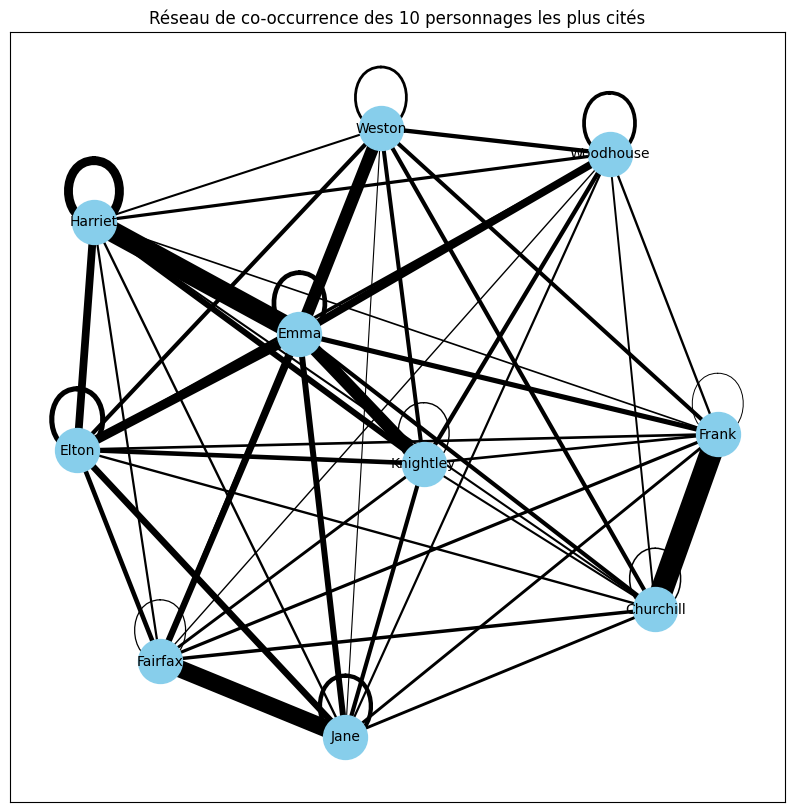

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize

# Récupérer les 10 personnages les plus cités (noms propres)
top_10_characters = set([name for name, freq in fdist_proper.most_common(10)])
print("Top 10 personnages :", top_10_characters)

# Initialiser le graphe
G = nx.Graph()

# Parcourir les phrases du texte
sentences = sent_tokenize(data)
for sent in sentences:
    tokens_sent = word_tokenize(sent)
    # Extraire les personnages présents dans la phrase parmi le top 10
    present_characters = [word for word in tokens_sent if word in top_10_characters]
    # Pour chaque paire de personnages présents, ajouter ou mettre à jour l'arête dans le graphe
    for i in range(len(present_characters)):
        for j in range(i+1, len(present_characters)):
            if G.has_edge(present_characters[i], present_characters[j]):
                G[present_characters[i]][present_characters[j]]['weight'] += 1
            else:
                G.add_edge(present_characters[i], present_characters[j], weight=1)

# Visualiser le graphe
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [edge_data['weight'] for (_, _, edge_data) in edges]

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=[w*0.1 for w in weights])
plt.title("Réseau de co-occurrence des 10 personnages les plus cités")
plt.show()


Ce script construit un réseau de co-occurrence entre les dix personnages les plus cités dans le texte. Pour cela, il segmente le roman en phrases, identifie les personnages (parmi le top 10) qui apparaissent ensemble dans chaque phrase, puis crée ou incrémente une arête entre ces personnages dans un graphe NetworkX.

**Interprétation du graphe**  
- Chaque **nœud** (cercle) représente un des dix personnages les plus cités.  
- Une **arête** entre deux nœuds signale qu’ils co-apparaissent dans au moins une phrase.  
- L’**épaisseur** de l’arête traduit la fréquence de co-occurrence : plus elle est grande, plus ces deux personnages apparaissent souvent ensemble dans le texte.  

# 7. Thèmes par chapitre puis par volume

In [ ]:
import nltk
import re
from nltk import FreqDist

# Assurez-vous que le tagger est téléchargé
nltk.download('averaged_perceptron_tagger')

# Définir le set d'exclusions
exclusions = {"Mr.", "Mrs.", "Miss", "Mr"}

# --- Segmentation du texte en chapitres ---
# Découpage sur les délimitations de chapitres, par exemple "Chapter 1", "Chapter I", etc.
chapters = re.split(r'\n\s*(?:Chapter\s+(?:\d+|[IVXLCDM]+))\s*\n', data, flags=re.IGNORECASE)

# Filtrer les chapitres trop courts (par exemple, l'en-tête ou les notes)
chapters = [chap.strip() for chap in chapters if len(chap.strip()) > 200]

print("Nombre de chapitres identifiés :", len(chapters))

# --- Pour chaque chapitre, tokenisation, POS tagging, catégorisation et affichage des top 3 tokens ---
for i, chapter in enumerate(chapters):
    print(f"=== Chapitre {i+1} ===")
    tokens = nltk.word_tokenize(chapter)
    pos_tags = nltk.pos_tag(tokens)

    # Définir les catégories
    categories = {
        'nouns': [],        # Noms : NN, NNS, NNP, NNPS
        'verbs': [],        # Verbes : VB, VBD, VBG, VBN, VBP, VBZ
        'adjectives': [],   # Adjectifs : JJ, JJR, JJS
        'adverbs': []       # Adverbes : RB, RBR, RBS
    }

    # Répartition des tokens dans les catégories avec exclusion pour les noms
    for token, tag in pos_tags:
        if tag.startswith('NN'):
            # Exclure les tokens qui sont dans le set des exclusions
            if token not in exclusions:
                categories['nouns'].append(token)
        elif tag.startswith('VB'):
            categories['verbs'].append(token)
        elif tag.startswith('JJ'):
            categories['adjectives'].append(token)
        elif tag.startswith('RB'):
            categories['adverbs'].append(token)

    # Afficher les 3 tokens les plus fréquents pour chaque catégorie
    for cat, tokens_list in categories.items():
        freq_dist = FreqDist(tokens_list)
        top_three = freq_dist.most_common(3)
        print(f"{cat.capitalize()} : {top_three}")

    print("\n" + "-"*50 + "\n")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Nombre de chapitres identifiés : 55
=== Chapitre 1 ===
Nouns : [('Taylor', 23), ('Emma', 21), ('Weston', 14)]
Verbs : [('was', 40), ('be', 37), ('had', 34)]
Adjectives : [('own', 10), ('great', 9), ('little', 8)]
Adverbs : [('not', 38), ('very', 24), ('so', 19)]

--------------------------------------------------

=== Chapitre 2 ===
Nouns : [('Weston', 12), ('Churchill', 10), ('Highbury', 7)]
Verbs : [('was', 47), ('had', 38), ('be', 11)]
Adjectives : [('own', 10), ('great', 5), ('little', 5)]
Adverbs : [('not', 11), ('never', 10), ('so', 8)]

--------------------------------------------------

=== Chapitre 3 ===
Nouns : [('Emma', 9), ('evening', 8), ('Woodhouse', 7)]
Verbs : [('was', 38), ('had', 22), ('be', 15)]
Adjectives : [('own', 9), ('such', 8), ('much', 5)]
Adverbs : [('very', 19), ('not', 14), ('so', 11)]

--------------------------------------------------

=== Chapitre 4 ===
Nouns : [('Harriet', 28), ('Martin', 23), ('man', 16)]
Verbs : [('be', 63), ('was', 57), ('had', 40)]


Ce code segmente le texte en chapitres, effectue une tokenisation et un POS tagging, puis répartit les tokens en quatre catégories (noms, verbes, adjectifs, et adverbes) en excluant certains titres indésirables pour les noms. Ensuite, il calcule et affiche les trois tokens les plus fréquents par catégorie pour chaque chapitre, fournissant ainsi un aperçu des termes dominants dans chaque section du texte.

Le prochain code nous permet d'avoir une vision plus générale du livre.

## Par volume et le texte entier

In [ ]:
import nltk
import re
from nltk import FreqDist

# Assurez-vous que les ressources nécessaires sont téléchargées
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Set d'exclusions pour les noms
exclusions = {"Mr.", "Mrs.", "Miss", "Mr"}

def analyze_text(text, label="Texte"):
    print(f"=== Analyse de {label} ===")
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)

    # Définir les catégories de tokens
    categories = {
        'nouns': [],        # Noms : NN, NNS, NNP, NNPS (excluant certaines entités)
        'verbs': [],        # Verbes : VB, VBD, VBG, VBN, VBP, VBZ
        'adjectives': [],   # Adjectifs : JJ, JJR, JJS
        'adverbs': []       # Adverbes : RB, RBR, RBS
    }

    # Répartition des tokens selon leur catégorie en excluant certains noms
    for token, tag in pos_tags:
        if tag.startswith('NN'):
            if token not in exclusions:
                categories['nouns'].append(token)
        elif tag.startswith('VB'):
            categories['verbs'].append(token)
        elif tag.startswith('JJ'):
            categories['adjectives'].append(token)
        elif tag.startswith('RB'):
            categories['adverbs'].append(token)

    # Afficher les 3 tokens les plus fréquents pour chaque catégorie
    for cat, tokens_list in categories.items():
        freq_dist = FreqDist(tokens_list)
        top_three = freq_dist.most_common(3)
        print(f"{cat.capitalize()} : {top_three}")
    print("\n" + "-"*50 + "\n")

# === 1. Analyse pour l'ensemble du texte ===
analyze_text(data, "tout le texte")

# === 2. Analyse par volume ===
# Supposons que le texte comporte une segmentation en volumes avec des en-têtes de type "Volume I", "Volume II", etc.
volumes = re.split(r'\n\s*(?:Volume\s+(?:\d+|[IVXLCDM]+))\s*\n', data, flags=re.IGNORECASE)
volumes = [vol.strip() for vol in volumes if len(vol.strip()) > 200]

print("Nombre de volumes identifiés :", len(volumes))
for i, volume in enumerate(volumes):
    analyze_text(volume, f"Volume {i+1}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


=== Analyse de tout le texte ===
Nouns : [('Emma', 852), ('Harriet', 481), ('Weston', 436)]
Verbs : [('was', 2383), ('be', 1965), ('had', 1605)]
Adjectives : [('little', 343), ('such', 321), ('much', 306)]
Adverbs : [('not', 2242), ('very', 1144), ('so', 883)]

--------------------------------------------------

Nombre de volumes identifiés : 3
=== Analyse de Volume 1 ===
Nouns : [('Emma', 250), ('Harriet', 211), ('Elton', 139)]
Verbs : [('was', 632), ('be', 601), ('had', 436)]
Adjectives : [('good', 121), ('little', 115), ('much', 114)]
Adverbs : [('not', 693), ('very', 401), ('so', 299)]

--------------------------------------------------

=== Analyse de Volume 2 ===
Nouns : [('Emma', 247), ('Jane', 164), ('Weston', 163)]
Verbs : [('was', 790), ('be', 675), ('had', 486)]
Adjectives : [('little', 133), ('much', 97), ('such', 88)]
Adverbs : [('not', 771), ('very', 406), ('so', 310)]

--------------------------------------------------

=== Analyse de Volume 3 ===
Nouns : [('Emma', 354),

L'analyse sur l'ensemble du texte montre que les personnages les plus cités sont « Emma », « Harriet » et « Weston », ce qui reflète l'importance centrale de ces figures dans le récit. Les verbes dominants (« was », « be », « had ») soulignent la prédominance d'états et d'actions narratifs, tandis que les adjectifs et adverbes fréquents (« little », « such », « much » et « not », « very », « so ») indiquent que le style de Jane Austen utilise des qualificatifs concis pour caractériser les personnages et les situations.

En examinant la segmentation par volume, on remarque des variations intéressantes : dans le Volume 1, on note une forte présence d'Emma, Harriet et Elton, suggérant une mise en place initiale des relations; le Volume 2 met en avant Emma, Jane et Weston, ce qui peut refléter un recentrage sur certains conflits ou interactions; et enfin le Volume 3 fait ressortir Emma, Harriet et Knightley, soulignant peut-être la montée en puissance ou la résolution des arcs narratifs liés à ces personnages. Globalement, ces données illustrent comment la narration structure la présence et l'importance des personnages à travers le récit.

#8.  Sentiment associé aux personnages

In [ ]:
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# Assurez-vous que les ressources nécessaires sont téléchargées
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialisation de l'analyseur de sentiment VADER
sia = SentimentIntensityAnalyzer()

# --- Segmentation du texte en chapitres ---
# Découpage sur les délimitations de chapitres (ex : "Chapter 1" ou "Chapter I", etc.)
chapters = re.split(r'\n\s*(?:Chapter\s+(?:\d+|[IVXLCDM]+))\s*\n', data, flags=re.IGNORECASE)
# On filtre les chapitres trop courts (par exemple, en-tête ou notes)
chapters = [chap.strip() for chap in chapters if len(chap.strip()) > 200]
print("Nombre de chapitres identifiés :", len(chapters))

# --- Extraction des personnages (top 10) ---
# On part du code déjà exécuté qui extrait les noms propres en excluant "Mr.", "Mrs.", "Miss", "Mr"
exclusions = {"Mr.", "Mrs.", "Miss", "Mr"}
proper_nouns = [word for (word, tag) in nltk.pos_tag(nltk.word_tokenize(data))
                if tag in ("NNP", "NNPS") and word not in exclusions]
fdist_proper = nltk.FreqDist(proper_nouns)
top_characters = [name for name, freq in fdist_proper.most_common(10)]
print("Top 10 personnages :", top_characters)

# --- Analyse de sentiment pour les passages liés aux personnages ---
# On va parcourir chaque chapitre, extraire les phrases et, pour chaque phrase qui mentionne un personnage,
# calculer le score de sentiment et l'agréger dans un dictionnaire.
character_sentiments = {character: [] for character in top_characters}

for chapter in chapters:
    sentences = sent_tokenize(chapter)
    for sentence in sentences:
        sentence_lower = sentence.lower()
        for character in top_characters:
            if character.lower() in sentence_lower:
                score = sia.polarity_scores(sentence)
                character_sentiments[character].append(score)

# --- Calcul et affichage des scores moyens pour chaque personnage ---
avg_character_sentiments = {}
for character, scores in character_sentiments.items():
    if scores:
        avg_score = {
            'neg': sum(s['neg'] for s in scores) / len(scores),
            'neu': sum(s['neu'] for s in scores) / len(scores),
            'pos': sum(s['pos'] for s in scores) / len(scores),
            'compound': sum(s['compound'] for s in scores) / len(scores),
        }
    else:
        avg_score = None
    avg_character_sentiments[character] = avg_score

print("\n--- Score de sentiment moyen pour chaque personnage (sur tous les chapitres) ---\n")
for character, avg in avg_character_sentiments.items():
    print(f"Sentiment moyen pour {character} : {avg}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Nombre de chapitres identifiés : 55
Top 10 personnages : ['Emma', 'Harriet', 'Weston', 'Knightley', 'Elton', 'Woodhouse', 'Jane', 'Fairfax', 'Churchill', 'Frank']

--- Score de sentiment moyen pour chaque personnage (sur tous les chapitres) ---

Sentiment moyen pour Emma : {'neg': 0.07449339735894363, 'neu': 0.7871560624249689, 'pos': 0.13835654261704666, 'compound': 0.2525003601440576}
Sentiment moyen pour Harriet : {'neg': 0.0761479028697572, 'neu': 0.785225165562913, 'pos': 0.13861589403973512, 'compound': 0.24718653421633535}
Sentiment moyen pour Weston : {'neg': 0.0541728971962617, 'neu': 0.8138037383177565, 'pos': 0.1319929906542055, 'compound': 0.2717682242990655}
Sentiment moyen pour Knightley : {'neg': 0.06007512953367874, 'neu': 0.8307279792746113, 'pos': 0.10920466321243529, 'compound': 0.21668160621761642}
Sentiment moyen pour Elton : {'neg': 0.05472117962466486, 'neu': 0.8220026809651474, 'pos': 0.12328954423592492, 'compound': 0.28846890080428944}
Sentiment moyen pour Woo

Les scores indiquent que, dans les passages où ces personnages apparaissent, le ton général est majoritairement neutre avec une légère tendance positive. Voici une interprétation détaillée :

- **Emma :**
  - **Négatif (7.45 %)** : Une faible proportion de passages exprime des sentiments négatifs.
  - **Neutre (78.7 %)** : La majorité du texte autour d’Emma est neutre.
  - **Positif (13.84 %)** : Une proportion modérée exprime un sentiment positif.
  - **Compound (0.2525)** : Ce score composite, positif mais modéré, suggère que les passages associés à Emma tendent à être légèrement positifs dans l'ensemble.

- **Harriet :**
  - **Négatif (7.61 %)**, **Neutre (78.5 %)**, **Positif (13.86 %)** : Ces proportions sont très proches de celles d’Emma.
  - **Compound (0.2472)** : Indique également une tonalité légèrement positive, à peu près équivalente à celle d’Emma.

- **Weston :**
  - **Négatif (5.42 %)** : Une proportion encore plus faible de passages négatifs.
  - **Neutre (81.38 %)** : Une part légèrement plus élevée de contenu neutre.
  - **Positif (13.20 %)** : Une proportion similaire de passages positifs.
  - **Compound (0.2718)** : Un score un peu plus élevé que pour Emma et Harriet, ce qui suggère que, dans l’ensemble, les passages concernant Weston pourraient être perçus comme légèrement plus positifs.

En résumé, les trois personnages sont majoritairement décrits dans des contextes neutres, avec une légère inclinaison vers le positif. Weston présente une nuance un peu moins négative et un compound légèrement supérieur, ce qui pourrait indiquer qu’il est perçu dans un contexte légèrement plus favorable, mais les différences restent subtiles.

# 9. Les lieux et les organisations les plus cités

## Les lieux

In [ ]:
import spacy
from collections import Counter
import nltk

# Charger le modèle spaCy en anglais
nlp = spacy.load('en_core_web_sm')

# Traiter le texte complet contenu dans "data"
doc = nlp(data)

# Extraire les entités nommées de type "GPE" et "LOC"
location_entities = [ent.text for ent in doc.ents if ent.label_ in ("GPE", "LOC")]

# Calculer la fréquence des entités extraites
location_freq = Counter(location_entities)

# Afficher les 10 lieux les plus cités
print("Top 10 lieux les plus cités :")
top_locations = []
for loc, count in location_freq.most_common(10):
    print(f"{loc}: {count} occurrences")
    top_locations.append(loc)

# Créer un objet nltk.Text à partir du texte complet pour utiliser la méthode concordance
tokens = nltk.word_tokenize(data)
text_obj = nltk.Text(tokens)

# Pour chaque lieu, afficher 5 concordances
for loc in top_locations:
    print(f"\nConcordances pour {loc} :")
    text_obj.concordance(loc, lines=5)


Top 10 lieux les plus cités :
Hartfield: 154 occurrences
London: 44 occurrences
Fairfax: 38 occurrences
Highbury: 28 occurrences
Randalls: 14 occurrences
Ireland: 14 occurrences
Richmond: 13 occurrences
Abbey: 9 occurrences
Box Hill: 9 occurrences
Kingston: 8 occurrences

Concordances pour Hartfield :
Displaying 5 of 160 matches:
ening must be struggled through at Hartfield , before Christmas brought the nex
ost amounting to a town , to which Hartfield , in spite of its separate lawn , 
 spent all the rest of her life at Hartfield . Emma smiled and chatted as cheer
s ' absence , and now walked up to Hartfield to say that all were well in Bruns
 after all . I think you must know Hartfield enough to comprehend that . '' `` 

Concordances pour London :
Displaying 5 of 45 matches:
ved by matrimony , being settled in London , only sixteen miles off , was much
tly from their mutual connexions in London . He had returned to a late dinner 
lready established in a good way in London , which aff

Ce code extrait les 10 lieux les plus cités du texte et affiche leurs concordances, ce qui offre une idée précise des espaces où se déroule l'histoire. Par exemple, un lieu comme Hartfield, qui apparaît 154 fois, est souvent cité dans des contextes clés du récit, indiquant qu'il constitue un cadre central de l'action d'Emma Woodhouse. De même, d'autres localisations comme London, Highbury ou Richmond montrent que l'intrigue se déroule dans divers environnements—du milieu rural aux milieux urbains—ce qui reflète les différences sociales et géographiques explorées dans le roman. En étudiant les contextes (les concordances) où ces lieux apparaissent, on peut mieux comprendre comment Jane Austen situe l'action et comment les différents espaces influencent la dynamique narrative et les interactions entre les personnages.

Oremarque que Fairfax est mal interprété, il s'agit d'un personnage et non d'une localisation.

## Les organisations

In [ ]:
import spacy
from collections import Counter
import nltk

# Charger le modèle spaCy en anglais
nlp = spacy.load('en_core_web_sm')

# Traiter le texte complet contenu dans "data"
doc = nlp(data)

# Extraire les entités nommées de type "ORG" (organisations)
org_entities = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

# Calculer la fréquence des entités extraites
org_freq = Counter(org_entities)

# Afficher les 10 organisations les plus citées et stocker leur nom
print("Top 10 organisations les plus citées :")
top_orgs = []
for org, count in org_freq.most_common(10):
    print(f"{org}: {count} occurrences")
    top_orgs.append(org)

# Créer un objet nltk.Text à partir du texte complet pour utiliser la méthode concordance
tokens = nltk.word_tokenize(data)
text_obj = nltk.Text(tokens)

# Pour chaque organisation, afficher 5 concordances
for org in top_orgs:
    print(f"\nConcordances pour {org} :")
    text_obj.concordance(org, lines=5)


Top 10 organisations les plus citées :
Woodhouse: 135 occurrences
Randalls: 68 occurrences
Highbury: 41 occurrences
Campbell: 34 occurrences
Donwell: 30 occurrences
Emma: 20 occurrences
Eltons: 19 occurrences
Crown: 17 occurrences
Churchills: 13 occurrences
Campbells: 11 occurrences

Concordances pour Woodhouse :
Displaying 5 of 310 matches:
ten 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and rich , w
 years had Miss Taylor been in Mr. Woodhouse 's family , less as a governess th
 disparity in their ages ( and Mr. Woodhouse had not married early ) was much i
py circumstance , and animated Mr. Woodhouse for some time . Mr. Knightley had 
ctorily . When this was over , Mr. Woodhouse gratefully observed , `` It is ver

Concordances pour Randalls :
Displaying 5 of 88 matches:
My dear , how am I to get so far ? Randalls is such a distance . I could not w
 sure he will always like going to Randalls , because of his daughter 's being
er settling till he could purchase Randa

#10. Clustering pour les verbes et adjectifs

Contrairement au code précédent, extraire les organisations cités dans le docuement ne fonctionne pas très bien et il est difficile d'extrairee donc certains types d'informations.

In [ ]:
!pip install --upgrade numpy gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires pydantic>=2.9.2, bu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Modèle Word2Vec entraîné.
Nombre total d'adjectifs associés à Emma : 1486
Nombre total de verbes associés à Emma : 4845
Nombre d'adjectifs uniques : 332
Nombre de verbes uniques : 681


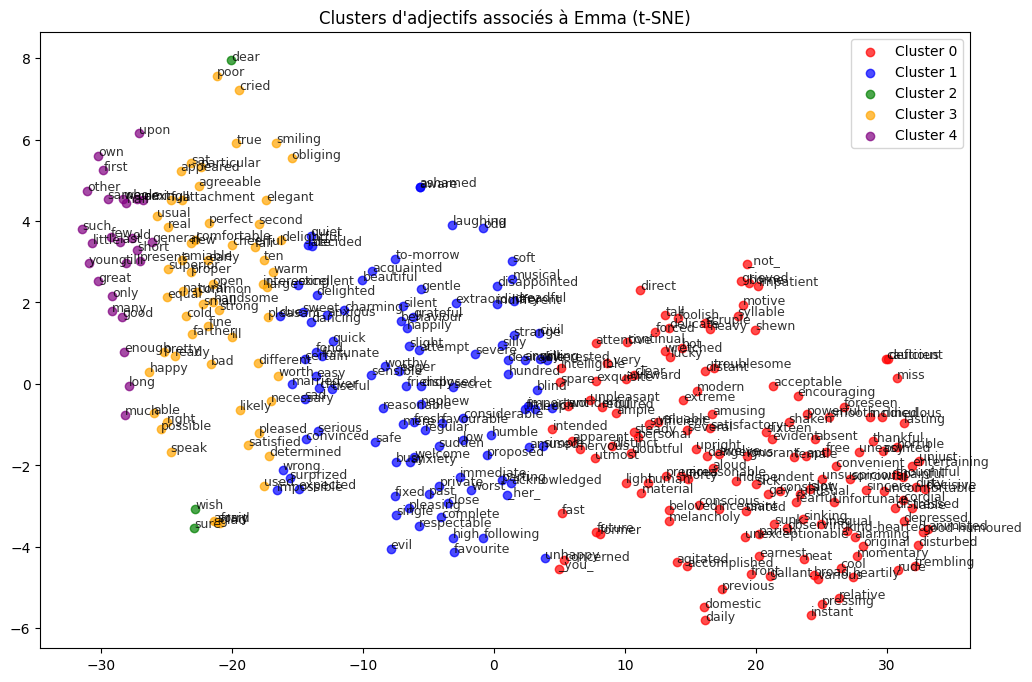


Cluster d'adjectifs 0:
['unusual', 'depressed', 'grieved', 'shaken', 'disturbed', 'beloved', 'material', 'various', 'horrible', 'syllable', 'future', 'unexceptionable', 'sorrowful', 'awkward', 'miss', 'valuable', 'nervous', 'good-humoured', 'fearful', 'unsuspicious', 'painful', 'encouraging', 'distinct', 'front', 'borne', 'slow', 'intelligible', 'scruple', 'unfortunate', '_very_', 'liable', 'momentary', '_not_', 'instant', 'earnest', 'upright', 'troublesome', 'fast', 'ample', 'neat', 'thoughtful', 'continual', 'absent', 'decisive', 'heartily', 'direct', 'dirty', 'animated', 'wonderful', 'broad', 'observing', 'sincere', 'modern', 'inclined', 'doubtful', 'motive', 'utmost', 'delicate', 'impatient', 'previous', 'cool', 'tall', 'ridiculous', 'unequal', 'foolish', 'evident', '_you_', 'entertaining', 'distressed', 'light', 'convenient', 'constant', 'gallant', 'clear', 'trembling', 'foreseen', 'precious', 'human', 'lucky', 'alarming', 'gay', 'forty', 'kind-hearted', 'sinking', 'satisfactory'

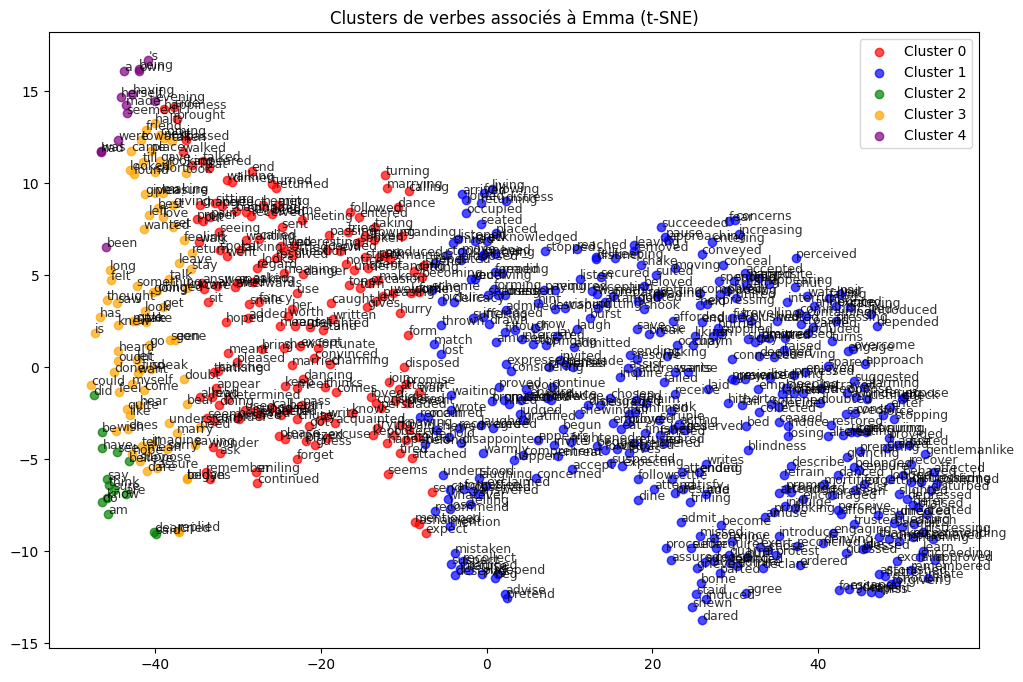


Cluster de verbes 0:
['seem', 'form', 'persuaded', 'caught', 'yes', 'walked', 'except', 'doing', 'hearing', 'guess', 'appeared', 'read', 'stand', 'send', 'produced', 'proper', 'write', 'followed', 'notice', 'attached', 'brought', 'pleasing', 'regret', 'interesting', 'talking', 'fortunate', 'consider', 'tried', 'delighted', 'expect', 'help', 'settled', 'received', 'turning', 'end', 'happiness', 'observe', 'passed', 'turned', 'led', 'convinced', 'resolved', 'walking', 'talked', 'finding', 'hurry', 'keep', 'surprized', 'called', 'chuse', 'fixed', 'used', 'slight', 'put', 'answer', 'perfect', 'use', 'struck', 'remember', 'smile', 'calling', 'disposed', 'care', 'taking', 'considered', 'charming', 'believed', 'tone', 'welcome', 'kept', 'ashamed', 'beginning', 'comes', 'spoken', 'returned', 'begin', 'engaged', 'allowed', 'paid', 'seeing', 'thinks', 'meaning', 'happened', 'walk', 'pain', 'lived', 'pass', 'entered', 'wait', 'ask', 'meant', 'satisfied', 'wanting', 'tired', 'allow', 'knows', 'sp

In [ ]:
import numpy as np
import nltk
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

# --- 1. Préparation du corpus et entraînement du modèle Word2Vec ---
sentences = [word_tokenize(sent) for sent in sent_tokenize(data)]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
print("Modèle Word2Vec entraîné.")

# --- 2. Extraction des adjectifs et verbes associés à un personnage ---
character = "Emma"
adj_tags = {"JJ"}
verb_tags = {"VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}
adj_words = []
verb_words = []

for sent in sent_tokenize(data):
    if character.lower() in sent.lower():
        tokens = nltk.word_tokenize(sent)
        pos_tags = nltk.pos_tag(tokens)
        for token, tag in pos_tags:
            token_lower = token.lower()
            # Vérifier si le token se trouve dans le vocabulaire du modèle Word2Vec
            if token_lower in model.wv:
                if tag in adj_tags:
                    adj_words.append(token_lower)
                elif tag in verb_tags:
                    verb_words.append(token_lower)

print(f"Nombre total d'adjectifs associés à {character} : {len(adj_words)}")
print(f"Nombre total de verbes associés à {character} : {len(verb_words)}")
unique_adjs = list(set(adj_words))
unique_verbs = list(set(verb_words))
print("Nombre d'adjectifs uniques :", len(unique_adjs))
print("Nombre de verbes uniques :", len(unique_verbs))

# --- 3. Clustering et visualisation pour les adjectifs ---
adj_vectors = [model.wv[word] for word in unique_adjs]
adj_vectors_np = np.array(adj_vectors)
n_clusters_adj = 5
kmeans_adj = KMeans(n_clusters=n_clusters_adj, random_state=42)
labels_adj = kmeans_adj.fit_predict(adj_vectors_np)

# Réduction dimensionnelle avec t-SNE pour les adjectifs
tsne_adj = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_adj = tsne_adj.fit_transform(adj_vectors_np)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(n_clusters_adj):
    xs = [reduced_adj[j, 0] for j in range(len(unique_adjs)) if labels_adj[j] == i]
    ys = [reduced_adj[j, 1] for j in range(len(unique_adjs)) if labels_adj[j] == i]
    plt.scatter(xs, ys, c=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.7)
    for j in range(len(unique_adjs)):
        if labels_adj[j] == i:
            plt.annotate(unique_adjs[j], (reduced_adj[j, 0], reduced_adj[j, 1]), fontsize=9, alpha=0.8)
plt.title(f"Clusters d'adjectifs associés à {character} (t-SNE)")
plt.legend()
plt.show()

# Affichage des mots par cluster pour les adjectifs dans la console
for i in range(n_clusters_adj):
    cluster_adjs = [unique_adjs[j] for j in range(len(unique_adjs)) if labels_adj[j] == i]
    print(f"\nCluster d'adjectifs {i}:")
    print(cluster_adjs)

# --- 4. Clustering et visualisation pour les verbes ---
verb_vectors = [model.wv[word] for word in unique_verbs]
verb_vectors_np = np.array(verb_vectors)
n_clusters_verb = 5
kmeans_verb = KMeans(n_clusters=n_clusters_verb, random_state=42)
labels_verb = kmeans_verb.fit_predict(verb_vectors_np)

# Réduction dimensionnelle avec t-SNE pour les verbes
tsne_verb = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_verb = tsne_verb.fit_transform(verb_vectors_np)

plt.figure(figsize=(12, 8))
for i in range(n_clusters_verb):
    xs = [reduced_verb[j, 0] for j in range(len(unique_verbs)) if labels_verb[j] == i]
    ys = [reduced_verb[j, 1] for j in range(len(unique_verbs)) if labels_verb[j] == i]
    plt.scatter(xs, ys, c=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.7)
    for j in range(len(unique_verbs)):
        if labels_verb[j] == i:
            plt.annotate(unique_verbs[j], (reduced_verb[j, 0], reduced_verb[j, 1]), fontsize=9, alpha=0.8)
plt.title(f"Clusters de verbes associés à {character} (t-SNE)")
plt.legend()
plt.show()

# Affichage des mots par cluster pour les verbes dans la console
for i in range(n_clusters_verb):
    cluster_verbs = [unique_verbs[j] for j in range(len(unique_verbs)) if labels_verb[j] == i]
    print(f"\nCluster de verbes {i}:")
    print(cluster_verbs)


- **Pour les adjectifs**, on remarque que certains groupes rassemblent des qualificatifs qui expriment des émotions intenses ou des jugements forts, tandis que d'autres regroupent des adjectifs plus neutres ou quantitatifs. Par exemple, le premier cluster contient des mots comme "unusual", "depressed" ou "horrible", qui traduisent des états affectifs ou une intensité émotionnelle dans la narration. Un autre groupe réunit des adjectifs de mesure et de comparaison tels que "own", "little", "great", "few", "enough", ce qui souligne la manière dont le récit utilise ces termes pour situer des quantités ou des degrés. D'autres clusters se distinguent par des termes très courts et affectifs comme "wish", "dear", "sure", tandis qu’un dernier groupe contient des qualificatifs décrivant directement le cadre ou l'apparence, avec des mots comme "large", "comfortable" ou "different".

- **Pour les verbes**, on remarque également une diversité de fonctions. Un premier cluster regroupe de nombreux verbes de discours et de transition comme "seem", "spoke", "trying" ou "appeared", illustrant la fluidité du récit et la manière dont les dialogues et transitions sont structurés. Un autre groupe semble se concentrer sur des verbes exprimant des opinions et des états introspectifs – on y trouve "obliged", "imagine", "thought", "believe" – qui indiquent les réflexions et les souhaits des personnages. Un troisième ensemble se focalise sur des actions concrètes, avec des termes tels que "took", "giving", "having", "brought", qui décrivent les mouvements et les événements. Enfin, un dernier cluster regroupe des verbes auxiliaires très courants comme "do", "am", "think", "said", qui sont utilisés pour construire les phrases sans apporter une charge sémantique forte.

- Dans l’ensemble, ces graphes révèlent la richesse des registres employés dans le texte : les adjectifs varient de qualificatifs émotionnels à des descripteurs plus neutres ou quantitatifs, tandis que les verbes montrent à la fois l’importance des actions narratives et des structures de discours. Cela permet d’apprécier comment l’auteur module ses descriptions et comment les interactions et états d’esprit des personnages sont exprimés de manière nuancée.

# 11. Traduction de texte

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
model_name = "croissantllm/CroissantLLMChat-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
generation_args = {
    "max_new_tokens": 256,
    "do_sample": True,
    "temperature": 0.3,
    "top_p": 0.90,
    "top_k": 40,
    "repetition_penalty": 1.05,
    "eos_token_id": [tokenizer.eos_token_id, 32000],
}

tokenizer_config.json:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/18.0k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/397M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Code issue du notebook des cours

## Extraire une phrase aléatoire dans le le texte

In [ ]:
import random
# Découper le texte en phrases
sentences = nltk.sent_tokenize(data)

# Sélectionner une phrase aléatoirement
random_sentence = random.choice(sentences)

print("Phrase aléatoire extraite du livre :")
print(random_sentence)

Phrase aléatoire extraite du livre :
Conceive what the events of a week have done
in that family!


In [ ]:
chat = [
   {"role": "user", "content": "Traduire en français : Conceive what the events of a week have done in that family !"},
]
chat_input = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
inputs = tokenizer(chat_input, return_tensors="pt").to(model.device)
tokens = model.generate(**inputs, **generation_args)
print(tokenizer.decode(tokens[0]))
# print tokens individually
print([(tokenizer.decode([tok]), tok) for tok in tokens[0].tolist()])

Setting `pad_token_id` to `eos_token_id`:32000 for open-end generation.


<s><|im_start|> user
Traduire en français : Conceive what the events of a week have done in that family!<|im_end|> 
<|im_start|> assistant
 Prévoyez les événements de la semaine qui ont eu lieu dans cette famille !<|im_end|>
[('<s>', 1), ('<|im_start|>', 32001), ('user', 3592), ('\nTra', 18823), ('duire', 4868), ('en', 1186), ('français', 2720), (':', 1257), ('Con', 2236), ('ceive', 21217), ('what', 2216), ('the', 1135), ('events', 7408), ('of', 1161), ('a', 1110), ('week', 3255), ('have', 1537), ('done', 4939), ('in', 1147), ('that', 1302), ('family', 4772), ('!', 108), ('<|im_end|>', 32000), ('\n', 1424), ('<|im_start|>', 32001), ('assistant', 20036), ('\n', 106), ('Pré', 8487), ('v', 193), ('oyez', 9358), ('les', 1207), ('événements', 12420), ('de', 1125), ('la', 1158), ('semaine', 6360), ('qui', 1357), ('ont', 2004), ('eu', 4795), ('lieu', 3601), ('dans', 1313), ('cette', 1816), ('famille', 4446), ('!', 1590), ('<|im_end|>', 32000)]


On remarquera que les phrases simples sont mieux traduites, dès que le vocabulaire est plus riche ou que la structure de la phrase est plus complexe, la fonction ne traduit pas correctement la phrase

# 12. Pipeline de question réponse

In [ ]:
!pip install farm-haystack


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.4/764.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 11.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bb1c73b675068b5f1e068c148272b79aabd218f358b0f9ff9c5d44e2a0ad3755
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc7448

In [ ]:
!pip install transformers


In [ ]:


# --- Chargement du texte depuis le corpus Gutenberg ---
import nltk
from nltk.corpus import gutenberg

# Télécharger les ressources nécessaires (si ce n'est pas déjà fait)
nltk.download('gutenberg')
nltk.download('punkt_tab')

# Charger le texte "Emma" de Jane Austen
data = gutenberg.raw('austen-emma.txt')

# --- Préparation du corpus ---
# On découpe le texte en documents (paragraphes) en utilisant le double saut de ligne comme séparateur
docs = [{"content": paragraph} for paragraph in data.split("\n\n") if len(paragraph.strip()) > 200]
print(f"Nombre de documents créés : {len(docs)}")

# --- Création et indexation dans le DocumentStore ---
from haystack.document_stores import InMemoryDocumentStore
document_store = InMemoryDocumentStore()
document_store.write_documents(docs)

# --- Configuration du Retriever et du Reader ---
from haystack.nodes import DensePassageRetriever, FARMReader

# Création du retriever en utilisant les bons noms de paramètres
retriever = DensePassageRetriever(
    document_store=document_store,
    passage_embedding_model="facebook/dpr-ctx_encoder-single-nq-base",  # modèle pour encoder les passages
    query_embedding_model="facebook/dpr-question_encoder-single-nq-base",  # modèle pour encoder les questions
    use_gpu=True  # Mettez True si le GPU est activé dans Colab
)

# Met à jour les embeddings pour les documents indexés
document_store.update_embeddings(retriever)

# Configuration du reader (modèle de question-réponse basé sur RoBERTa)
reader = FARMReader(model_name_or_path="deepset/roberta-base-squad2", use_gpu=True)

# --- Construction du pipeline QA ---
from haystack.pipelines import ExtractiveQAPipeline
pipe = ExtractiveQAPipeline(reader, retriever)

# --- Exemple d'interrogation ---
question = "Who is Emma in the novel?"
result = pipe.run(query=question, params={"Retriever": {"top_k": 10}, "Reader": {"top_k": 5}})

print("\n--- Résultat de la question ---")
for answer in result['answers']:
    print(f"Réponse: {answer.answer}")
    print(f"Score: {answer.score}")
    print(f"Contexte: {answer.context}\n")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Nombre de documents créés : 1341


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Create embeddings: 100%|██████████| 1344/1344 [19:33<00:00,  1.15 Docs/s]
Documents Processed: 10000 docs [19:36,  8.50 docs/s]


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Inferencing Samples: 100%|██████████| 1/1 [00:09<00:00,  9.57s/ Batches]


--- Résultat de la question ---
Réponse: Emma Woodhouse
Score: 0.8305453658103943
Contexte: 
Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; a

Réponse: Miss Smith
Score: 0.7385059595108032
Contexte: had
particular pleasure in sending them away happy.  The happiness
of Miss Smith was quite equal to her intentions.  Miss Woodhouse
was so great a per

Réponse: Jane
Score: 0.5762758851051331
Contexte: st sincerely interested.  Her heart had been long growing
kinder towards Jane; and this picture of her present sufferings acted
as a cure of every for

Réponse: Miss Fairfax
Score: 0.378153920173645
Contexte: vided between
two ideas--her own former conversations with him about Miss Fairfax;
and poor Harriet;--and for some time she could only exclaim,
and re

Réponse: Harriet
Score: 0.35727643966674805
Contexte: ith all her heart
and understanding--really for the time convinced that Harriet wa

- Ce code sert à interroger automatiquement le texte de Emma et à retourner des réponses extraites directement des documents indexés, facilitant ainsi l'analyse sémantique et la recherche d'information dans le roman.

- On voit que pour savoir qui est Emma, la réponse semble juste (score de 0,80 environ), puisque le personnage est décrit en détail dès le chapitre 1, on voit par la suite que dès la question est plus complexe, il a plus de mal à sortir des réponses pertienntes.  

## autres questions




In [ ]:
question = "Which are the organisations ?"
result = pipe.run(query=question, params={"Retriever": {"top_k": 10}, "Reader": {"top_k": 5}})
for answer in result['answers']:
    print(f"Réponse: {answer.answer}")
    print(f"Score: {answer.score}")
    print(f"Contexte: {answer.context}\n")


Inferencing Samples: 100%|██████████| 1/1 [00:21<00:00, 21.34s/ Batches]

Réponse: the Coles
Score: 0.3522738218307495
Contexte:  do not wonder at you.  If one could ascertain what the
chief of them--the Coles, for instance.  They are not far off.
Shall I call upon them?  Or Mis

Réponse: all three
Score: 0.3105972409248352
Contexte: g fixed, so absolutely fixed, in the same place, was bad
for each, for all three.  Not one of them had the power of removal,
or of effecting any mater

Réponse: the elder
Score: 0.2845352292060852
Contexte: talked of their own concerns and pursuits, but principally
of those of the elder, whose temper was by much the most communicative,
and who was always 

Réponse: Mrs. Churchill's
importance in the world, and Jane Fairfax's
Score: 0.23854589462280273
Contexte: eady engaged her mind.  The contrast between Mrs. Churchill's
importance in the world, and Jane Fairfax's, struck her; one was
every thing, the other 

Réponse: every body
Score: 0.20361968874931335
Contexte: ou, he will talk of farming; to me,
of drawing or music; and so

Puisque la fonction pour extraire les organisations n'a pas été concluante, on réésaye ici pour observer que : il sembe parler de groupes de personnes voir, d'une personne et non d'une organisation structuré.

In [ ]:
question = "What is the relationship between Emma and Mr. Knightley?"
result = pipe.run(query=question, params={"Retriever": {"top_k": 10}, "Reader": {"top_k": 5}})
for answer in result['answers']:
    print(f"Réponse: {answer.answer}")
    print(f"Score: {answer.score}")
    print(f"Contexte: {answer.context}\n")


Inferencing Samples: 100%|██████████| 1/1 [00:39<00:00, 39.62s/ Batches]

Réponse: cordial respect
Score: 0.4839633107185364
Contexte: e rest of the party
as with Mr. Knightley.  She was received with a cordial respect
which could not but please, and given all the consequence she coul

Réponse: friendship
Score: 0.38437503576278687
Contexte: that she
_refused_ _him_.  Their affection was always to subside into friendship.
Every thing tender and charming was to mark their parting;
but still

Réponse: passionately loved
Score: 0.37537315487861633
Contexte: ight think herself not unworthy of being peculiarly,
exclusively, passionately loved by Mr. Knightley.  _She_ could not.
She could not flatter herself

Réponse: first in interest and affection
Score: 0.36704301834106445
Contexte: her happiness depended on being _first_ with Mr. Knightley,
first in interest and affection.--Satisfied that it was so,
and feeling it her due, she ha

Réponse: considering her as a friend
Score: 0.238961860537529
Contexte: anner to her--nothing could
more agreeably denote his wish 

In [ ]:
question = "What is the main conflict in Emma?"
result = pipe.run(query=question, params={"Retriever": {"top_k": 10}, "Reader": {"top_k": 5}})

for answer in result['answers']:
    print(f"Réponse: {answer.answer}")
    print(f"Score: {answer.score}")
    print(f"Contexte: {answer.context}\n")


Inferencing Samples: 100%|██████████| 1/1 [00:08<00:00,  8.86s/ Batches]

Réponse: her own
Score: 0.4230860769748688
Contexte: father tolerably
through the evening, and be attacked by no regrets but her own.
The backgammon-table was placed; but a visitor immediately afterwards

Réponse: the children in Brunswick Square
Score: 0.35939571261405945
Contexte:  her plan; she would speak of something
totally different--the children in Brunswick Square; and she
only waited for breath to begin, when Mr. Knightl

Réponse: the weather and Mrs. Weston
Score: 0.28969606757164
Contexte: very
possible occasion.  When they had all talked a little while in harmony
of the weather and Mrs. Weston, she found herself abruptly addressed with,

Réponse: her own former conversations with him about Miss Fairfax;
and poor Harriet
Score: 0.26715773344039917
Contexte: r mind was divided between
two ideas--her own former conversations with him about Miss Fairfax;
and poor Harriet;--and for some time she could only ex

Réponse: The loss of the ball--the loss of the young man
Score: 0.25

In [ ]:
question = "Who is Darth Vader ?"
result = pipe.run(query=question, params={"Retriever": {"top_k": 10}, "Reader": {"top_k": 5}})

for answer in result['answers']:
    print(f"Réponse: {answer.answer}")
    print(f"Score: {answer.score}")
    print(f"Contexte: {answer.context}\n")


Inferencing Samples: 100%|██████████| 1/1 [00:12<00:00, 12.48s/ Batches]

Réponse: Lord of the earth and sea
Score: 0.23533621430397034
Contexte: ave!
      Man's boasted power and freedom, all are flown.
    Lord of the earth and sea, he bends a slave,
      And woman, lovely woman, reigns alon

Réponse: --
Score: 0.062221329659223557
Contexte: "
and "York Tan" were bringing down and displaying on the counter,
he said--"But I beg your pardon, Miss Woodhouse, you were speaking
to me, you were 

Réponse: he would be here before the time named
Score: 0.03356414660811424
Contexte:  cried Mr. Weston with exultation, "I told
you all that he would be here before the time named.  I remembered
what I used to do myself.  One cannot cr

Réponse: from nobody
Score: 0.020854385569691658
Contexte: "No, sir," replied his son, laughing, "I seem to have had it
from nobody.--Very odd!--I really was persuaded of Mrs. Weston's
having mentioned it in o

Réponse: Mr. Frank Churchill
Score: 0.019413024187088013
Contexte: to a different person.
I could almost assert that you had _

En hors contexte, on voit que le score peut tout de même etre à 0,23, il faut donc prendre ses résultats avec des pincettes et vérifier par la suite ces résultats.

# **Conclusion**

L'ensemble de l'analyse du roman Emma de Jane Austen, par le biais de techniques de traitement du langage naturel – depuis l'extraction d'entités nommées et l'analyse des fréquences lexicales (lemmatisation, stemming) jusqu'aux visualisations de clusters d'adjectifs et de verbes, en passant par l'indexation et le question-réponse via Haystack – met en évidence la richesse stylistique et la complexité narrative de l'œuvre. Chaque méthode apporte une perspective complémentaire : les analyses de fréquence et de concordance révèlent les mots structurants et les personnages centraux, tandis que le clustering et la réduction dimensionnelle offrent un aperçu des registres émotionnels et descriptifs employés par l'auteur. En combinant ces approches, il est possible de dégager une compréhension approfondie des thèmes, des interactions entre personnages et de l'évolution du style narratif, soulignant ainsi l'efficacité des outils numériques modernes dans l'analyse littéraire.

In [8]:
!jupyter nbconvert --to html --ClearOutputPreprocessor.enabled=True --no-input "/content/drive/MyDrive/M2 MASTER/Analyse sémantique/ Emma, Jane Austen , Maxence GENET, V1.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/M2 MASTER/Analyse sémantique/ Emma, Jane Austen , Maxence GENET, V1.ipynb to html
[NbConvertApp] Writing 582435 bytes to /content/drive/MyDrive/M2 MASTER/Analyse sémantique/ Emma, Jane Austen , Maxence GENET, V1.html
